In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,ShuffleSplit
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm, zscore
#import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# Classification from 5 cluster clear speech-detection

In [2]:
pathr="/home/sultan/EEG/CLUSTER_channels/S_E12/"
fnamecl='Allsube12.xlsx'
d=pd.read_excel(pathr+fnamecl)
print("Total rows: {0}".format(len(d)))

Total rows: 32


In [3]:
# allacc=[];
# for count in range(2,108):
#     dpc=[];yc=[];
#     for i in range(3):
#         a=[]
#         k=0
#         for j in range(5):
#             #print i,k
#             dd=d.values[i,k+count]
#             #b=np.concatenate((M,dd),axis=0)
#             j+=1
#             k=106*j
#             a.append(dd)      
#         y=d.values[i,0]
#         a.append(y)
#         dpc.append(a)
#         c=pd.DataFrame(dpc)
#         X=c.iloc[:,0:5]
#         labels=c.iloc[:,5]

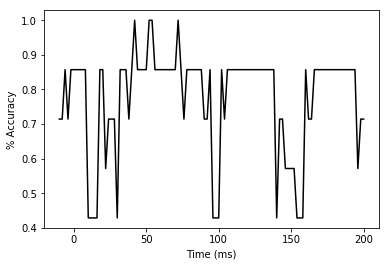

In [19]:
allacc=[];
for count in range(2,108):# Number of sample in the data
    dpc=[];yc=[];
    for i in range(32):
        a=[]
        k=0
        for j in range(5):
            #print i,k
            dd=d.values[i,k+count] # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=106*j
            a.append(dd)      
        y=d.values[i,0]; # Label first column
        a.append(y)
        dpc.append(a)
        c=pd.DataFrame(dpc)
        #print c
        X=c.iloc[:,0:5]
        labels=c.iloc[:,5]
        #print y
    #print X, labels
    X_scaled = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,labels, test_size=.20, random_state=40) 
    #par=np.unique(y_test,return_counts=True)
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100],'gamma':[0.01,.002]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train, y_train)
    accf= clf.cv_results_['mean_test_score']
    accf
    acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
    allacc.append(acc)
    Acdall=pd.DataFrame(allacc)
    #print acc*100.0
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdall,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.show()

In [5]:
#c

In [20]:
#print par
time=pd.DataFrame(t)
tadall=pd.concat([time, Acdall],axis=1)
selt=tadall.iloc[25:34]
av=selt.mean()
print selt,'\n','The average accuracy over the time is:', av.iloc[1]*100.0
#print tad.iloc[20:42]
#tad.to_csv('clear_speech_classi.csv')

       0         0
25  40.0  0.857143
26  42.0  1.000000
27  44.0  0.857143
28  46.0  0.857143
29  48.0  0.857143
30  50.0  0.857143
31  52.0  1.000000
32  54.0  1.000000
33  56.0  0.857143 
The average accuracy over the time is: 90.47619047619047


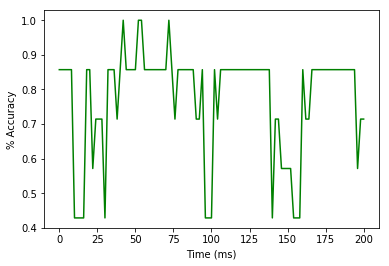

In [44]:
# For ploting after -10ms (i.e.,start from 0)
t1=tadall.iloc[5:,0];Acd1=tadall.iloc[5:,1];
plt.plot(t1,Acd1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
plt.show()

# Classification from RH's two clusters (C1, C2)

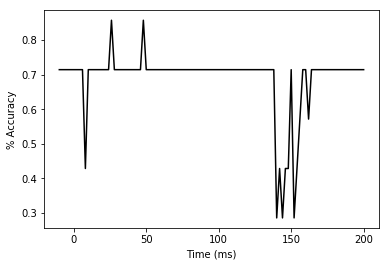

In [77]:
allacc=[];
for count in range(2,108): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;rs=59;#rs=43;seltrh=tadrh.iloc[20:34];[25:34] acc=67.34,65.07936, rs=59, acc=73.015
        for j in range(2):
            #print i,k
            dd=d.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            k=106*j
            a.append(dd) # append features      
        y=d.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
# Upto this feature extraction
        #print y
    #print X
    X_scaled = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,labels, test_size=.20, random_state=rs) 
    #par=np.unique(y_test,return_counts=True)
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100],'gamma':[0.01,.002]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train, y_train)
    accf= clf.cv_results_['mean_test_score']
    accf
    acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
    allacc.append(acc)
    Acdrh=pd.DataFrame(allacc)
    #print acc*100.0
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdrh,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.show()

In [78]:
#print par
time=pd.DataFrame(t)
tadrh=pd.concat([time, Acdrh],axis=1)
seltrh=tadrh.iloc[25:34]
avrh=seltrh.mean()
print seltrh,'\n','The average accuracy over the time is:', avrh.iloc[1]*100.0
#print tad.iloc[20:42]
#tad.to_csv('clear_speech_classi.csv')

       0         0
25  40.0  0.714286
26  42.0  0.714286
27  44.0  0.714286
28  46.0  0.714286
29  48.0  0.857143
30  50.0  0.714286
31  52.0  0.714286
32  54.0  0.714286
33  56.0  0.714286 
The average accuracy over the time is: 73.01587301587303


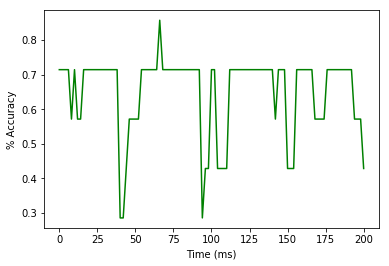

In [53]:
# For ploting after -10ms (i.e.,start from 0)
t1=tadrh.iloc[5:,0];Acd1=tadrh.iloc[5:,1];
plt.plot(t1,Acd1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
plt.show()

# Classification from LH's two clusters (C3, C4)

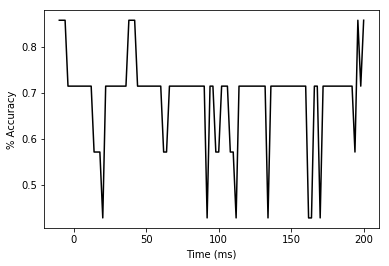

In [62]:
allacc=[];
for count in range(2,108): # Number of sample in the data
    dpc=[];yc=[]; # empty variable for dictionary
    for i in range(32): # number of participant
        a=[]; # Dictionary
        k=0 ;rs=45; # rs=57,seltlh=tadlh.iloc[27:37]; 74.28571428571429
        for j in range(2,4):
            k=106*j
            #print i,k
            dd=d.values[i,k+count] ; # data separate each sample
            #b=np.concatenate((M,dd),axis=0)
            j+=1
            a.append(dd) # append features      
        y=d.values[i,0]
        a.append(y)
        dpc.append(a) # data frame with label
        c=pd.DataFrame(dpc) # c is the new data 
        X=c.iloc[:,0:2] # X is the feature from clusters
        labels=c.iloc[:,2]
           #print y
    #print X
    X_scaled = preprocessing.scale(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,labels, test_size=.20, random_state=rs) 
    #par=np.unique(y_test,return_counts=True)
    cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100],'gamma':[0.01,.002]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train, y_train)
    accf= clf.cv_results_['mean_test_score']
    accf
    acc=accuracy_score(clf.best_estimator_.predict(X_test),y_test)
    allacc.append(acc)
    Acdlh=pd.DataFrame(allacc)
    #print acc*100.0
t=np.linspace(-10,200,106)
#Acd.plot(kind='line',ylim=[0,1])
plt.plot(t,Acdlh,c='k')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')
#print par
plt.show()

In [67]:
#print par
time=pd.DataFrame(t)
tadlh=pd.concat([time, Acdlh],axis=1)
seltlh=tadlh.iloc[25:36]
av=seltlh.mean()
print seltlh,'\n','The average accuracy over the time is:', av.iloc[1]*100.0
#print tad.iloc[40:60]
#tadn.to_csv('Noise-degraded.csv')

       0         0
25  40.0  0.857143
26  42.0  0.857143
27  44.0  0.714286
28  46.0  0.714286
29  48.0  0.714286
30  50.0  0.714286
31  52.0  0.714286
32  54.0  0.714286
33  56.0  0.714286
34  58.0  0.714286
35  60.0  0.714286 
The average accuracy over the time is: 74.02597402597402


In [ ]:
# For ploting after -10ms (i.e.,start from 0)
t1=tadlh.iloc[5:,0];Acdlh=tad.iloc[5:,1];
plt.plot(t1,Acd1,c='g')
plt.xlabel('Time (ms)')
plt.ylabel('% Accuracy')

In [ ]:
# ROC

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
#false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(pred, y_test)
#print false_positive_rate
roc_auc = auc(false_positive_rate, true_positive_rate)
#print 'FPR=',false_positive_rate,'\n','TPR=',true_positive_rate
fig,ax1=plt.subplots(ncols=1)
ax1.plot(false_positive_rate, true_positive_rate, 'b-', label = 'AUC = %0.2f' % roc_auc)
ax1.legend(loc = 'lower right')
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_ylabel('True Positive Rate')
ax1.set_xlabel('False Positive Rate')
ax1.set_title('Receiver Operating Characteristic')